In [1]:
import keras
import numpy as np
from tflearn.datasets import cifar10
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Softmax, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Reshape, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import pandas as pd
import datetime

Using TensorFlow backend.


In [2]:

# Hyperparameters
batch_size = 64
num_classes = 10 #pegar automaticamente NumPy.Unique
epochs = 200



In [3]:
# Load Cifar-10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


#

x_train.shape
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
#channel=1



In [4]:

#
x_train.shape

#


(50000, 32, 32, 3)

In [5]:
# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [6]:
img_width

32

In [7]:
model = Sequential()
#Filters = IMG_width/2 * 7
model.add(Conv2D(112, #alterado de 192 pra 112
                 (5,5), #alterado de 3 para 5 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
#model.add(BatchNormalization())
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
######### RESIZED ###########
model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
######### RESIZED ###########

model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Dropout(0.5))

          
#Filters = IMG_width/2 * 9
model.add(Conv2D(144, #alterado de 128 para 144
                 (5,5), 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
#model.add(BatchNormalization())
######### RESIZED ###########
model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
######### RESIZED ###########

model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Dropout(0.5))

          
          

#IMG_width^ 2
model.add(Conv2D(1024, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Dropout(0.5))

#camada anterior/
model.add(Conv2D(512, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Dropout(0.5))

model.add(Conv2D(10, 
                 (1,1),  
                 strides=(1,1), 
                 activation='softmax', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(GlobalAveragePooling2D())





In [8]:

# print the model summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 112)       8512      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 112)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 96)          10848     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 96)          9312      
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 144)         345744    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 144)         0         
__________

In [9]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy', #alterado de logcosh
              optimizer=SGD(lr=0.01, momentum=0.01, decay=0.0, nesterov=False),
              metrics=['accuracy'])


In [10]:

# Train the Model
#earlyStopping=keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=13, verbose=1, mode='auto')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
 #                   callbacks=[earlyStopping],
                    validation_data=(x_test, y_test))



Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 77s 2ms/step - loss: 2.3026 - acc: 0.0983 - val_loss: 2.3019 - val_acc: 0.1333
Epoch 2/200
50000/50000 [==============================] - 75s 2ms/step - loss: 2.3013 - acc: 0.1227 - val_loss: 2.3004 - val_acc: 0.1323
Epoch 3/200
50000/50000 [==============================] - 76s 2ms/step - loss: 2.2986 - acc: 0.1557 - val_loss: 2.2961 - val_acc: 0.1589
Epoch 4/200
50000/50000 [==============================] - 75s 2ms/step - loss: 2.2892 - acc: 0.1685 - val_loss: 2.2763 - val_acc: 0.1872
Epoch 5/200
50000/50000 [==============================] - 75s 2ms/step - loss: 2.2233 - acc: 0.1742 - val_loss: 2.1414 - val_acc: 0.1757
Epoch 6/200
50000/50000 [==============================] - 76s 2ms/step - loss: 2.1162 - acc: 0.1870 - val_loss: 2.2374 - val_acc: 0.1480
Epoch 7/200
50000/50000 [==============================] - 76s 2ms/step - loss: 2.0669 - acc: 0.1876 - val_loss: 2.0866 - 

50000/50000 [==============================] - 76s 2ms/step - loss: 1.3686 - acc: 0.4865 - val_loss: 1.4176 - val_acc: 0.4692
Epoch 60/200
50000/50000 [==============================] - 76s 2ms/step - loss: 1.3589 - acc: 0.4879 - val_loss: 1.3661 - val_acc: 0.4846
Epoch 61/200
50000/50000 [==============================] - 76s 2ms/step - loss: 1.3520 - acc: 0.4952 - val_loss: 1.5444 - val_acc: 0.4229
Epoch 62/200
50000/50000 [==============================] - 76s 2ms/step - loss: 1.3449 - acc: 0.4978 - val_loss: 1.3244 - val_acc: 0.5112
Epoch 63/200
50000/50000 [==============================] - 77s 2ms/step - loss: 1.3354 - acc: 0.5030 - val_loss: 1.3448 - val_acc: 0.5051
Epoch 64/200
50000/50000 [==============================] - 76s 2ms/step - loss: 1.3313 - acc: 0.5037 - val_loss: 1.5290 - val_acc: 0.4455
Epoch 65/200
50000/50000 [==============================] - 77s 2ms/step - loss: 1.3205 - acc: 0.5089 - val_loss: 1.3225 - val_acc: 0.5171
Epoch 66/200
50000/50000 [==============

50000/50000 [==============================] - 169s 3ms/step - loss: 1.0313 - acc: 0.6378 - val_loss: 1.2271 - val_acc: 0.5926
Epoch 118/200
50000/50000 [==============================] - 169s 3ms/step - loss: 1.0295 - acc: 0.6374 - val_loss: 1.0537 - val_acc: 0.6341
Epoch 119/200
50000/50000 [==============================] - 168s 3ms/step - loss: 1.0236 - acc: 0.6394 - val_loss: 1.0444 - val_acc: 0.6338
Epoch 120/200
50000/50000 [==============================] - 169s 3ms/step - loss: 1.0253 - acc: 0.6411 - val_loss: 1.0038 - val_acc: 0.6451
Epoch 121/200
50000/50000 [==============================] - 168s 3ms/step - loss: 1.0184 - acc: 0.6425 - val_loss: 1.0852 - val_acc: 0.6228
Epoch 122/200
50000/50000 [==============================] - 169s 3ms/step - loss: 1.0105 - acc: 0.6467 - val_loss: 1.3385 - val_acc: 0.5367
Epoch 123/200
50000/50000 [==============================] - 168s 3ms/step - loss: 1.0104 - acc: 0.6453 - val_loss: 1.0913 - val_acc: 0.6155
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 167s 3ms/step - loss: 0.8616 - acc: 0.7059 - val_loss: 0.9367 - val_acc: 0.6817
Epoch 176/200
50000/50000 [==============================] - 167s 3ms/step - loss: 0.8548 - acc: 0.7073 - val_loss: 0.9755 - val_acc: 0.6810
Epoch 177/200
50000/50000 [==============================] - 167s 3ms/step - loss: 0.8539 - acc: 0.7070 - val_loss: 1.0494 - val_acc: 0.6595
Epoch 178/200
50000/50000 [==============================] - 167s 3ms/step - loss: 0.8506 - acc: 0.7072 - val_loss: 0.9396 - val_acc: 0.6852
Epoch 179/200
50000/50000 [==============================] - 167s 3ms/step - loss: 0.8513 - acc: 0.7096 - val_loss: 0.9602 - val_acc: 0.6797
Epoch 180/200
50000/50000 [==============================] - 168s 3ms/step - loss: 0.8421 - acc: 0.7111 - val_loss: 0.9408 - val_acc: 0.6862
Epoch 181/200
50000/50000 [==============================] - 168s 3ms/step - loss: 0.8445 - acc: 0.7106 - val_loss: 0.9113 - val_acc: 0.6934
Epoch 182/200
50000/50000 [

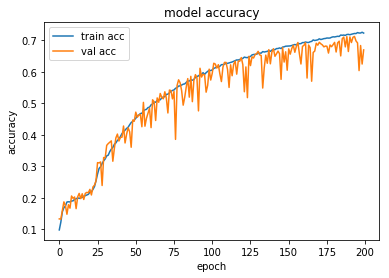

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc','val acc'], loc='upper left')
plt.show()

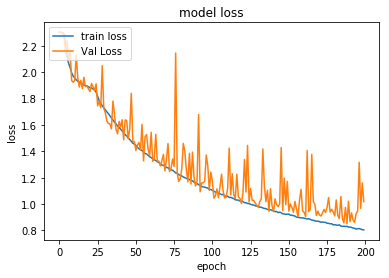

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','Val Loss'], loc='upper left')
plt.show()

In [13]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0188333415
Test accuracy: 0.6695


In [14]:
print(history.history)

{'val_loss': [2.3019361923217772, 2.3004403423309325, 2.2961241134643555, 2.2763276702880861, 2.1414071449279786, 2.2374280483245848, 2.0866345596313476, 2.1549593568801879, 1.9359820587158203, 1.9233694639205932, 1.9367387058258057, 2.1289830600738524, 1.9564845127105712, 1.8873464851379393, 1.9385995037078858, 1.8751523265838623, 1.9618651908874511, 1.8900038722991943, 1.8972657760620117, 1.872430708694458, 1.8530113513946533, 1.9148597566604615, 1.8888963378906249, 1.8612147315979004, 1.9116027107238769, 1.7440116382598876, 1.7819947685241699, 1.7295942602157592, 2.0484739753723145, 1.7278552440643311, 1.6929027774810792, 1.6312303609848022, 1.6101931663513183, 1.6083223934173585, 1.5701037220001222, 1.7806660736083983, 1.6821213607788086, 1.5648546985626222, 1.5321948318481444, 1.6273037088394164, 1.584153635597229, 1.6392652128219605, 1.486374433517456, 1.6381546237945557, 1.6327257076263428, 1.4956348903656005, 1.5702691339492798, 1.8392971525192261, 1.4735206750869752, 1.4736408

In [15]:
data = pd.DataFrame(history.history)
nome = 'DoubleConvCifar10NormDropFinalConvGap_t1' + str(datetime.datetime.now())+'.json'
data = data.to_json()
with open(nome, "w+") as output_file:
    output_file.write(data)